#### XGBoost Algorithm

XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient-boosted decision trees designed for performance and speed. It works by combining the predictions from multiple weak models (decision trees) to form a strong prediction. The algorithm sequentially trains trees, each correcting errors made by the previous ones, minimizing a loss function. XGBoost is known for its speed, scalability, and performance on both classification and regression tasks.

#### Random Data and Plot for XGBoost
We can generate synthetic data to illustrate how XGBoost works. For this example, let’s generate a classification dataset.

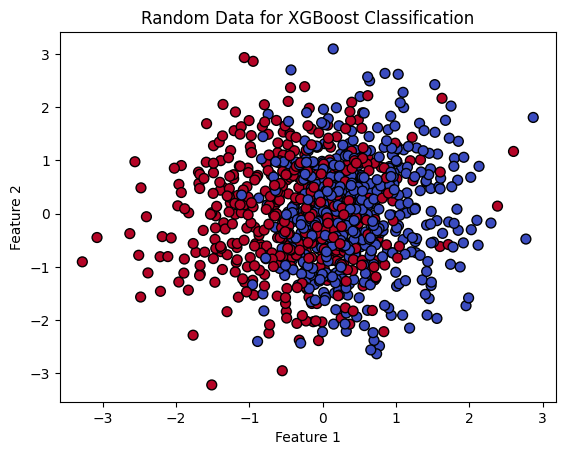

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a random binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_clusters_per_class=2, random_state=42)

# Scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Data for XGBoost Classification')
plt.show()


#### Is XGBoost Good for Regression or Classification?

XGBoost is excellent for both regression and classification tasks. It can handle binary and multi-class classification as well as regression tasks due to its flexibility. It supports different loss functions for both types of problems (e.g., logistic loss for classification and squared loss for regression).

#### Implement XGBoost from Scratch Using NumPy
Here’s a very simplified version of XGBoost implemented using NumPy. XGBoost builds decision trees in a sequential manner and optimizes based on the gradient of the loss function.

The implementation below is a simplified version of a decision tree regressor, focusing on the core concept.

In [2]:
import numpy as np

class SimpleXGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def _gradient(self, y_true, y_pred):
        return y_true - y_pred

    def _fit_tree(self, X, grad):
        # This will be a simple tree for illustration purposes
        thresholds = np.mean(X, axis=0)
        predictions = (X > thresholds).astype(float)
        return predictions

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for _ in range(self.n_estimators):
            grad = self._gradient(y, y_pred)
            tree = self._fit_tree(X, grad)
            y_pred += self.learning_rate * tree
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.zeros((X.shape[0],))

        for tree in self.trees:
            y_pred += self.learning_rate * tree

        return y_pred


SimpleXGBoost class:
This class mimics a simplified version of the XGBoost algorithm, focusing on the core idea of gradient boosting, which is to iteratively improve predictions by adding weak learners (in this case, simple decision trees) to correct errors made by the previous models.

- **__init__ method:**
```python
def __init__(self, n_estimators=100, learning_rate=0.1):
    self.n_estimators = n_estimators
    self.learning_rate = learning_rate
    self.trees = []
```
- n_estimators: This parameter specifies how many trees (weak learners) the model will train. Here, it is set to 100 by default.
- learning_rate: This parameter controls how much each tree's prediction contributes to the final prediction (i.e., it scales the tree’s output). It's a common parameter in boosting algorithms to prevent overfitting.
- self.trees: A list to store all the trees (weak learners) trained during the boosting process.

- **_gradient method:**
```python
def _gradient(self, y_true, y_pred):
    return y_true - y_pred
```

- This method calculates the gradient of the loss function. Here, the loss function is assumed to be mean squared error (MSE), so the gradient is simply the difference between the true values (y_true) and the current predictions (y_pred).
- The gradient represents how much the model's prediction should change in the next iteration to improve accuracy.


- **_fit_tree method:**
```python
def _fit_tree(self, X, grad):
    thresholds = np.mean(X, axis=0)
    predictions = (X > thresholds).astype(float)
    return predictions
```
- This method simulates a very simple decision tree. The tree is built based on the average feature values of the input X.
- thresholds: The mean value of each feature column in X is computed.
- predictions: The tree predicts 1 for any feature value greater than its corresponding threshold, and 0 otherwise.
- This is a rudimentary approximation and not a full decision tree, just for illustration.

- **fit method:**
```python
def fit(self, X, y):
    y_pred = np.zeros_like(y, dtype=float)

    for _ in range(self.n_estimators):
        grad = self._gradient(y, y_pred)
        tree = self._fit_tree(X, grad)
        y_pred += self.learning_rate * tree
        self.trees.append(tree)
```
- y_pred: Initially, the model predicts zeros for all examples. This is the starting point before any trees are added.

- **Boosting Loop:**
- The loop iterates n_estimators times, adding a tree in each iteration.
- grad: The gradient (difference between the true values and current predictions) is calculated using the _gradient method. This gradient tells the model how much adjustment is needed in the next iteration.
- tree: A new tree is fit to the data (X) based on the calculated gradient. The tree's prediction tries to "correct" the current model's error.
- Update y_pred: The predictions are updated by adding the tree's output, scaled by the learning rate.
- self.trees.append(tree): Each tree is saved so that it can be used later for prediction.


- **predict method:**
```python
def predict(self, X):
    y_pred = np.zeros((X.shape[0],))

    for tree in self.trees:
        y_pred += self.learning_rate * tree

    return y_pred
```

- y_pred: This initializes the prediction as zero.
- The final prediction is built by summing the predictions of all the trees, scaled by the learning rate.
- The idea is that each tree contributes a small part, gradually improving the model's accuracy.


In [ ]:
# More Complex Version of XGBoost
# Let's extend this to be more realistic, including better tree construction and loss handling.

import numpy as np
from sklearn.tree import DecisionTreeRegressor

class ComplexXGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        self.loss = self._mse_loss  # We'll use mean squared error loss

    def _gradient(self, y_true, y_pred):
        # Gradient of MSE loss (derivative)
        return y_true - y_pred

    def _fit_tree(self, X, grad):
        # Fit a more complex decision tree (e.g., using sklearn's DecisionTreeRegressor)
        tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        tree.fit(X, grad)
        return tree

    def _mse_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for i in range(self.n_estimators):
            grad = self._gradient(y, y_pred)
            tree = self._fit_tree(X, grad)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

            # Optionally print the loss after each iteration
            loss = self.loss(y, y_pred)
            print(f"Iteration {i+1}, Loss: {loss}")

    def predict(self, X):
        y_pred = np.zeros((X.shape[0],))

        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred


Enhancements:

- Decision Trees:
    - We're using DecisionTreeRegressor from sklearn to build more realistic trees with control over depth (max_depth) and minimum samples required to split a node (min_samples_split).

- Loss Function:
    - We added a method _mse_loss to compute the mean squared error after each iteration to track the model's performance.

- Gradient Calculation:
    - Gradient is still the difference between y_true and y_pred because we're optimizing for mean squared error.

- Tree Fitting:
    - The trees now fit on the residuals (gradients) using a more sophisticated regression tree, which allows for more accurate predictions compared to the simple threshold-based method from before.

- Tracking Loss:
    - We print the loss after each iteration for a better understanding of how the model is improving over time.

This version is much closer to a real-world XGBoost implementation, although real XGBoost has additional complexities like regularization, shrinkage, feature importance, and more advanced loss functions (like logistic loss for classification).

#### When to Use XGBoost and When Not to Use It

#### When to Use XGBoost:
- Structured/tabular data: XGBoost excels at handling structured data (columns of features).
- Medium to large datasets: It's optimized for performance and works well on large datasets.
- Regression and classification: Works well for both types of tasks.
- When you need scalability: XGBoost can handle distributed computing and large-scale datasets efficiently.

#### When Not to Use XGBoost:
- Small datasets: On very small datasets, simpler models like logistic regression or decision trees may perform equally well with less complexity.
- Unstructured data: For image, text, or audio data, deep learning models like CNNs or RNNs are often more suitable.
- Highly correlated features: XGBoost may not perform well when there are many correlated features, and this can increase overfitting.

#### What is the Loss Function?
In XGBoost, the loss function measures the difference between the predicted values and the actual values. It helps the algorithm to update the model by calculating the gradient. For classification, the common loss function is logistic loss (for binary classification), while for regression tasks, it’s typically mean squared error (MSE).

#### Loss function examples:

- Regression: Squared error loss (MSE).
- Binary Classification: Logistic loss.
- Multi-class Classification: Softmax cross-entropy loss.

#### How Are Trees Calculated?
In XGBoost, trees are built sequentially, where each new tree corrects the errors of the previous one by focusing on the residuals. The process involves:

- Calculating gradients (first-order derivative of the loss function) for the current prediction errors.
- Building a decision tree that fits the gradients, thus correcting the errors.
- Updating the predictions by adding the new tree’s output to the current predictions.

The trees are built using a combination of greedy algorithms to find the best splits and regularization to prevent overfitting.

#### How to Optimize the Algorithm
XGBoost offers several hyperparameters to optimize:

- n_estimators: Number of trees.
- max_depth: Maximum depth of a tree.
- learning_rate: Shrinks the contribution of each tree to prevent overfitting.
- colsample_bytree: Fraction of features to consider when building a tree.
- subsample: Fraction of training data to use per tree.

To optimize XGBoost, you can:

- Use Grid Search or Random Search for hyperparameter tuning.
- Adjust early stopping to prevent overfitting.
- Use cross-validation to ensure the model generalizes well.

#### Feature Comparison: GBDT vs. XGBoost

| **Feature**               | **GBDT**                                    | **XGBoost**                                                                 |
|---------------------------|---------------------------------------------|-----------------------------------------------------------------------------|
| **Optimization**          | Gradient Descent                           | Gradient Descent with Second-Order Information (uses Hessian for precision) |
| **Regularization**        | Less emphasis on regularization            | Strong emphasis on L1 and L2 regularization to prevent overfitting          |
| **System Optimization**   | Less optimized                             | Parallel computing, cache-aware access, and efficient algorithms            |
| **Handling Missing Values** | Less efficient handling                   | Built-in efficient handling of missing values                               |
